# Iris Flower Classification Dataset

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

    * Sepal Length
    * Sepal Width
    * Petal Length
    * Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

    * Setosa
    * Versicolour
    * Virginica

## Data Exploratory and Pre-Processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
# checking for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
## finding out data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.duplicated().sum()

3

In [7]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 It seems like there are 3 duplicates found. No missing values, null values, balanced dataset as there are equal amount of data for each species. 
 
 The data seems to be pre-processed for carrying out the analysis. 
 
 As we have a small data set to even begin with, it wouldn't be a wise choice to drop the duplicates.

## Plotting for characteristic identification

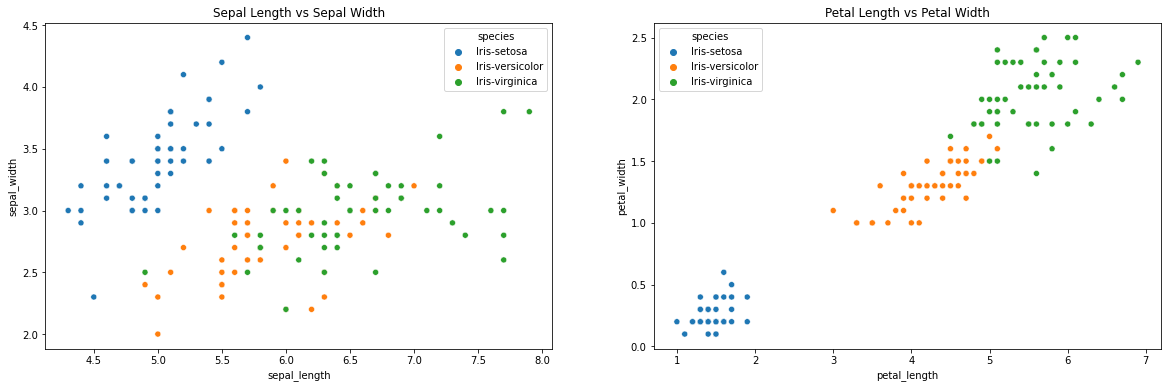

In [9]:

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
sns.scatterplot(ax=axs[0], x = "sepal_length", y ="sepal_width", hue='species',data=df)
axs[0].set_title("Sepal Length vs Sepal Width")

sns.scatterplot(ax=axs[1], x = "petal_length", y ="petal_width", hue='species',data=df)
axs[1].set_title("Petal Length vs Petal Width");

     1. Plot 1:
         * `Iris-Setosa` has smallest sepal length but highest width. 
         * `Iris-Virginica` has largest sepal lengths and smallest sepal widths.
         * `Iris-Versicolor` lies in the middle. 

     2. Plot 2:
         * `Iris-Setosa` has the smallest petal length as well as petal widths.
         * `Iris-Virginica` has the highest petal length as well as petal width.
         * `Iris-Versicolor` liest in the middle.

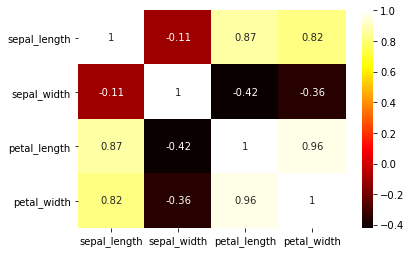

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='hot');

Observations:

`petal_width` and `sepal_length` have high correlation. 


`petal_length` and `sepal_length` have high correlations.


`petal_length` and `petal_width` have a high correlation. 

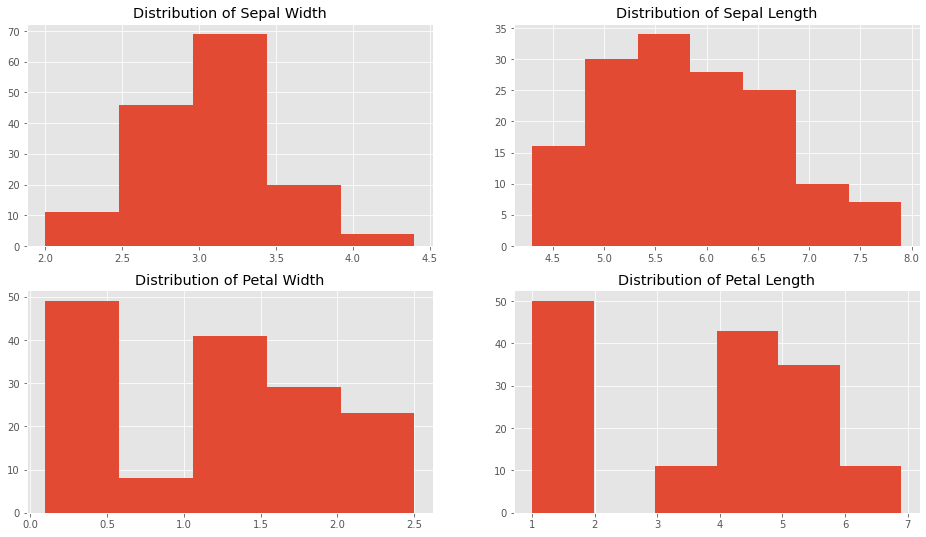

In [11]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal_length'], bins=6);

Distribution of Sepel Width and Length is unimodal, ranging between 4.4 to 7.9 ,with mean of nearly 3 and medial is somewhare between 3.3 to 3.5, maximum data fall between the range of 2.5 to 4

Distribution of Sepel Length is unimodal, ranging between 2.0 to 4.4 ,with mean of nearly 5.8 and medial is somewhare around 6, maximum data fall between the range of 5 to 7

Distribution of petal Width is bimodal, ranging between 0 to 2.5 ,with mean of nearly 1.2 and medial is somewhare around 1.4, maximum data fall between the range of 0.0 to 0.5 and between 1.0 to 1.5

Distribution of petal Length is biimodal, ranging between 1.0 to 6.9 ,with mean of nearly 4 and medial is somewhare between 4, maximum data fall between the range of 1 to 2 and 4 to 6

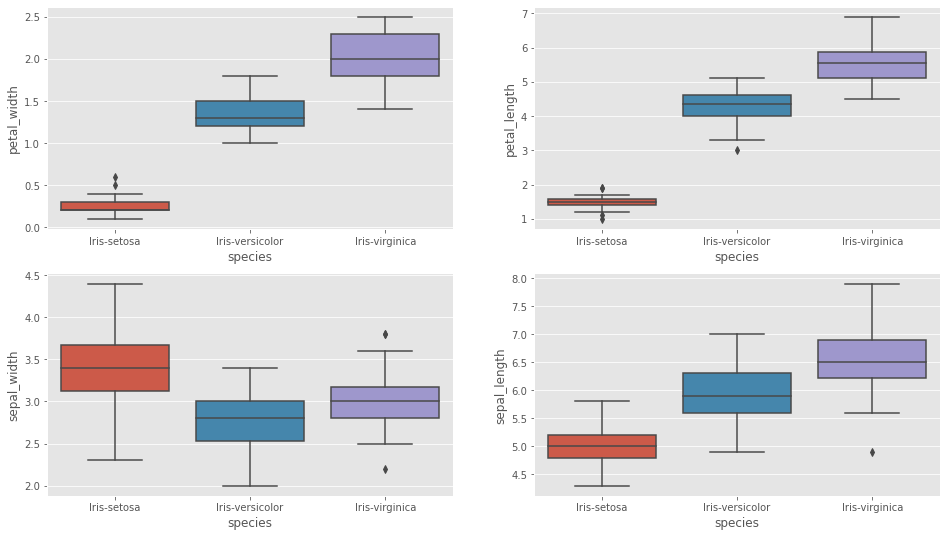

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_width", x= "species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

## Fitting the Model

In [13]:
## split data perform one hot encoding and get ready for modeling

# All except species column are features
x = df.drop('species',axis=1)

# variable that we are trying to predict
y = df['species']

## Perform One Hot Encoding
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.3)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

### Hyper Parameter Tuning using Grid Search CV

Cross-validation is the process of splitting the same dataset in K-partitions, and for each split, we search the whole grid of hyperparameters to an algorithm, in a brute force manner of trying every combination.. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

In [15]:
model  = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [16]:
model.best_params_

{'C': 100, 'gamma': 0.01}

In [17]:
prediction = model.predict(x_test)

<AxesSubplot:>

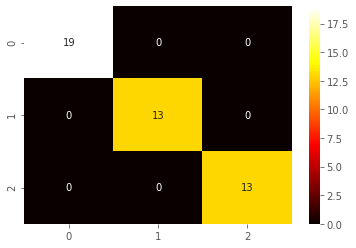

In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, prediction)
sns.heatmap(cf,annot=True,cmap='hot')

In [20]:
model.score(x_test, y_test)

1.0

In [ ]:
model